# ***YOLOv8 Model***

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!pip install -q pandas pydicom opencv-python-headless scikit-learn segmentation-models-pytorch albumentations tqdm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 75.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.8/154.8 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 124.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 93.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 105.6 MB/s eta 0:00:00


In [14]:
!pip install ultralytics -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 34.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 58.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 34.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 869.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 43.4 MB/s eta 0:00:00


In [ ]:
!pip install SimpleITK

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 MB 12.7 MB/s eta 0:00:00


In [ ]:
!ls -l /content/drive/MyDrive/

ls: '/content/drive/MyDrive/CMU_CS 246_HIS_TEAM-5': No such file or directory
total 108344
-rw------- 1 root root    14271 Apr  8 14:40  {041BA208-7662-4148-A8EF-CD035CE6D0E3}.png
-rw------- 1 root root   136552 Apr 14  2021 '[123doc] - giao-an-dien-dan-dung-thpt-bai-2-an-toan-lao-dong-trong-giao-duc-nghe-dien-dan-dung-potx.pdf'
-rw------- 1 root root  1402886 Feb 17  2024  1357807b-1271-47a4-baf7-1bf192025ca2.mp4
-rw------- 1 root root  1312820 Jul 22 06:55  {14609081-9D62-4533-B816-1D5ED577DC0F}.png
-rw------- 1 root root   207821 Apr  4  2023  1680619893760.jpg
-rw------- 1 root root    29560 Apr  5  2023  1680674475012.jpg
-rw------- 1 root root    30175 Apr  5  2023  1680674603455.jpg
-rw------- 1 root root  2691348 Sep  7  2023  1690287514143.jpg
-rw------- 1 root root      177 Jul  4 05:42 '1.   Introduction:'$'\n''1.1.  Purpose:'$'\n''Place'$'\n''informati....gdoc'
-rw------- 1 root root      177 Jun 29 16:40 '1.    So sánh TRIGGER với STORE PROCEDURE?'$'\n''2.....gdoc'
-rw-

In [ ]:
# KIỂM TRA CẤP 2
!ls -l /content/drive/MyDrive/SIC-CAPSTONE-GROUP-4/

total 24
drwx------ 2 root root 4096 Aug  1 10:54 'CODE SOURCES'
drwx------ 2 root root 4096 Aug  4 03:46  DATA-TRAINING
drwx------ 2 root root 4096 Aug  4 03:49  DATATRAINING-pre
drwx------ 2 root root 4096 Jul 27 03:15  DOCUMENTS
drwx------ 2 root root 4096 Jul 31 03:34  SLIDE
drwx------ 2 root root 4096 Aug  4 05:25  YOLOv8_TRAINING_RESULTS


In [ ]:
# KIỂM TRA CẤP 3
!ls -l /content/drive/MyDrive/SIC-CAPSTONE-GROUP-4/DATA-TRAINING/

total 8
drwx------ 2 root root 4096 Aug  3 06:04 U-NET_Data-Training
drwx------ 2 root root 4096 Jul 31 12:52 YOLOv8_Data-Training


In [ ]:
# KIỂM TRA CẤP 4
!ls -l /content/drive/MyDrive/SIC-CAPSTONE-GROUP-4/DATA-TRAINING/YOLOv8_Data-Training/

total 11
drwx------ 2 root root 4096 Jul 31 12:52  Data
drwx------ 2 root root 4096 Jul 31 12:54 'Script (Chứa mã lệnh Python, có thể dùng để tự đánh giá hiệu suất model)'
-rw------- 1 root root 2588 Jul 31 12:53 'YOLOv8 model - GUIDE.txt'


In [ ]:
# Chạy ô này để xác minh sự tồn tại của tệp
!ls -l '/content/drive/MyDrive/SIC-CAPSTONE-GROUP-4/DATA-TRAINING/YOLOv8_Data-Training/Data/annotations.csv'

-rw------- 1 root root 136986 Jul 31 12:47 /content/drive/MyDrive/SIC-CAPSTONE-GROUP-4/DATA-TRAINING/YOLOv8_Data-Training/Data/annotations.csv


In [ ]:
# Chạy để kiểm tra nội dung của thư mục Data
!ls -l '/content/drive/MyDrive/SIC-CAPSTONE-GROUP-4/DATA-TRAINING/YOLOv8_Data-Training/Data'

total 124662
-rw------- 1 root root   136986 Jul 31 12:47 annotations.csv
-rw------- 1 root root 55427881 Jul 31 12:48 candidates.csv
-rw------- 1 root root 72058556 Jul 31 12:50 candidates_V2.csv
-rw------- 1 root root      740 Jul 31 12:47 sampleSubmission.csv
drwx------ 2 root root     4096 Jul 31 12:57 seg-lungs-LUNA16
drwx------ 2 root root     4096 Aug  1 07:42 subset0
drwx------ 2 root root     4096 Aug  1 07:42 subset1
drwx------ 2 root root     4096 Aug  1 07:42 subset2
drwx------ 2 root root     4096 Aug  1 07:42 subset3
drwx------ 2 root root     4096 Aug  1 07:42 subset4
drwx------ 2 root root     4096 Aug  1 07:42 subset5


## **STAGE 1: TIỀN XỬ LÝ VÀ CHUẨN BỊ DỮ LIỆU.**

In [ ]:
#-----------------------------------------------------------------------------
# Bước 1: Import các thư viện
#-----------------------------------------------------------------------------
print("▶️ Bước 1: Import các thư viện...")
import SimpleITK as sitk
import pandas as pd
import numpy as np
import os
from PIL import Image
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import shutil

print("✅ Hoàn tất import.")

#-----------------------------------------------------------------------------
# Bước 2: Thiết lập các đường dẫn
#-----------------------------------------------------------------------------
print("\n▶️ Bước 2: Thiết lập các đường dẫn...")

LUNA16_RAW_DATA_PATH = '/content/drive/MyDrive/SIC-CAPSTONE-GROUP-4/DATA-TRAINING/YOLOv8_Data-Training/Data'
OUTPUT_YOLO_PATH = '/content/drive/MyDrive/SIC-CAPSTONE-GROUP-4/DATATRAINING-pre/YOLOv8_Data-Training/LUNA16_YOLO_Format'

os.makedirs(OUTPUT_YOLO_PATH, exist_ok=True)
print(f"Đường dẫn dữ liệu gốc được đặt là: {LUNA16_RAW_DATA_PATH}")
print(f"Đảm bảo thư mục đầu ra tồn tại: {OUTPUT_YOLO_PATH}")

#-----------------------------------------------------------------------------
# Bước 3: Đọc và xử lý tệp annotations
#-----------------------------------------------------------------------------
print("\n▶️ Bước 3: Đọc và xử lý tệp annotations...")

try:
    annotations_path = os.path.join(LUNA16_RAW_DATA_PATH, 'annotations.csv')
    annotations_df = pd.read_csv(annotations_path)
    print(f"✅ Đã đọc thành công 'annotations.csv'. Tìm thấy {len(annotations_df)} nốt phổi.")

    #-----------------------------------------------------------------------------
    # Bước 4: Định nghĩa các hàm xử lý
    #-----------------------------------------------------------------------------
    print("\n▶️ Bước 4: Định nghĩa các hàm xử lý...")
    def world_to_voxel(world_coords, origin, spacing):
        stretched_voxel_coords = np.absolute(world_coords - origin)
        voxel_coords = stretched_voxel_coords / spacing
        return voxel_coords
    def normalize_image(img_array):
        MIN_BOUND = -1000.0
        MAX_BOUND = 400.0
        img_array = (img_array - MIN_BOUND) / (MAX_BOUND - MIN_BOUND)
        img_array[img_array > 1] = 1.0
        img_array[img_array < 0] = 0.0
        img_array *= 255.0
        return img_array.astype(np.uint8)
    print("✅ Các hàm đã sẵn sàng.")

    #-----------------------------------------------------------------------------
    # Bước 5: Vòng lặp chính - Trích xuất ảnh và tạo nhãn
    #-----------------------------------------------------------------------------
    print("\n▶️ Bước 5: Bắt đầu quá trình trích xuất ảnh và tạo nhãn...")
    temp_output_dir = os.path.join(OUTPUT_YOLO_PATH, 'temp_all_data')
    if os.path.exists(temp_output_dir): shutil.rmtree(temp_output_dir)
    os.makedirs(os.path.join(temp_output_dir, 'images'), exist_ok=True)
    os.makedirs(os.path.join(temp_output_dir, 'labels'), exist_ok=True)

    processed_files = []

    for _, row in tqdm(annotations_df.iterrows(), total=annotations_df.shape[0], desc="Đang xử lý các nốt phổi"):
        seriesuid = row['seriesuid']
        mhd_path = ""
        for subdir in os.listdir(LUNA16_RAW_DATA_PATH):
            if subdir.startswith('subset'):
                potential_path = os.path.join(LUNA16_RAW_DATA_PATH, subdir, subdir, f'{seriesuid}.mhd')
                if os.path.exists(potential_path):
                    mhd_path = potential_path
                    break

        if not mhd_path:
            continue

        sitk_image = sitk.ReadImage(mhd_path)
        image_array_3d = sitk.GetArrayFromImage(sitk_image)
        world_coords = np.array([row['coordZ'], row['coordY'], row['coordX']])
        diameter_mm = row['diameter_mm']
        origin = np.array(sitk_image.GetOrigin())
        spacing = np.array(sitk_image.GetSpacing())
        voxel_coords = world_to_voxel(world_coords, np.flip(origin), np.flip(spacing))
        slice_z = int(np.round(voxel_coords[0]))

        if 0 <= slice_z < image_array_3d.shape[0]:
            image_slice_2d = image_array_3d[slice_z, :, :]
            normalized_slice = normalize_image(image_slice_2d)
            img_h, img_w = normalized_slice.shape

            x_center = voxel_coords[2] / img_w
            y_center = voxel_coords[1] / img_h
            width = (diameter_mm / spacing[0]) / img_w
            height = (diameter_mm / spacing[1]) / img_h

            base_filename = f"{seriesuid}_slice{slice_z}"
            Image.fromarray(normalized_slice).save(os.path.join(temp_output_dir, 'images', f"{base_filename}.png"))
            with open(os.path.join(temp_output_dir, 'labels', f"{base_filename}.txt"), 'w') as f:
                f.write(f"0 {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}\n")
            processed_files.append(base_filename)

    print(f"✅ Hoàn tất trích xuất. Đã tạo ra {len(processed_files)} cặp ảnh/nhãn.")

    #-----------------------------------------------------------------------------
    # Bước 6: Chia dữ liệu thành tập Train và Validation
    #-----------------------------------------------------------------------------
    print("\n▶️ Bước 6: Chia dữ liệu thành tập Train (80%) và Validation (20%)...")
    unique_files = list(set(processed_files))
    if len(unique_files) < 2:
        print("LỖI: Không đủ file để chia. Cần ít nhất 2 file.")
    else:
        train_files, val_files = train_test_split(unique_files, test_size=0.2, random_state=42)
        for folder in ['train', 'valid']:
            os.makedirs(os.path.join(OUTPUT_YOLO_PATH, folder, 'images'), exist_ok=True)
            os.makedirs(os.path.join(OUTPUT_YOLO_PATH, folder, 'labels'), exist_ok=True)
        def move_files(file_list, dest_folder):
            for filename in tqdm(file_list, desc=f"Di chuyển file đến {dest_folder}"):
                shutil.move(os.path.join(temp_output_dir, 'images', f"{filename}.png"), os.path.join(OUTPUT_YOLO_PATH, dest_folder, 'images', f"{filename}.png"))
                shutil.move(os.path.join(temp_output_dir, 'labels', f"{filename}.txt"), os.path.join(OUTPUT_YOLO_PATH, dest_folder, 'labels', f"{filename}.txt"))
        move_files(train_files, 'train')
        move_files(val_files, 'valid')
        shutil.rmtree(temp_output_dir)

        print("\n ✅✅✅ HOÀN TẤT TOÀN BỘ QUÁ TRÌNH TIỀN XỬ LÝ! ✅✅✅")
        print(f"Dữ liệu đã được lưu tại: {OUTPUT_YOLO_PATH}")


except FileNotFoundError as e:
    print(f"❌ LỖI: Không tìm thấy tệp hoặc thư mục. Vui lòng kiểm tra lại đường dẫn.")
    print(f"Chi tiết: {e}")
except Exception as e:
    print(f"Đã xảy ra lỗi không xác định: {e}")

▶️ Bước 1: Import các thư viện...
✅ Hoàn tất import.

▶️ Bước 2: Thiết lập các đường dẫn...
Đường dẫn dữ liệu gốc được đặt là: /content/drive/MyDrive/SIC-CAPSTONE-GROUP-4/DATA-TRAINING/YOLOv8_Data-Training/Data
Đảm bảo thư mục đầu ra tồn tại: /content/drive/MyDrive/SIC-CAPSTONE-GROUP-4/DATATRAINING-pre/YOLOv8_Data-Training/LUNA16_YOLO_Format

▶️ Bước 3: Đọc và xử lý tệp annotations...
✅ Đã đọc thành công 'annotations.csv'. Tìm thấy 1186 nốt phổi.

▶️ Bước 4: Định nghĩa các hàm xử lý...
✅ Các hàm đã sẵn sàng.

▶️ Bước 5: Bắt đầu quá trình trích xuất ảnh và tạo nhãn...


Đang xử lý các nốt phổi: 100%|██████████| 1186/1186 [22:17<00:00,  1.13s/it]


✅ Hoàn tất trích xuất. Đã tạo ra 723 cặp ảnh/nhãn.

▶️ Bước 6: Chia dữ liệu thành tập Train (80%) và Validation (20%)...


Di chuyển file đến valid: 100%|██████████| 144/144 [00:00<00:00, 176.96it/s]



🎉🎉🎉 HOÀN TẤT TOÀN BỘ QUÁ TRÌNH TIỀN XỬ LÝ! 🎉🎉🎉
Dữ liệu đã được lưu tại: /content/drive/MyDrive/SIC-CAPSTONE-GROUP-4/DATATRAINING-pre/YOLOv8_Data-Training/LUNA16_YOLO_Format


## **STAGE 2: KIỂM TRA LẠI DỮ LIỆU ĐÃ XỬ LÝ.**


Đang vẽ ảnh và bounding box tương ứng...


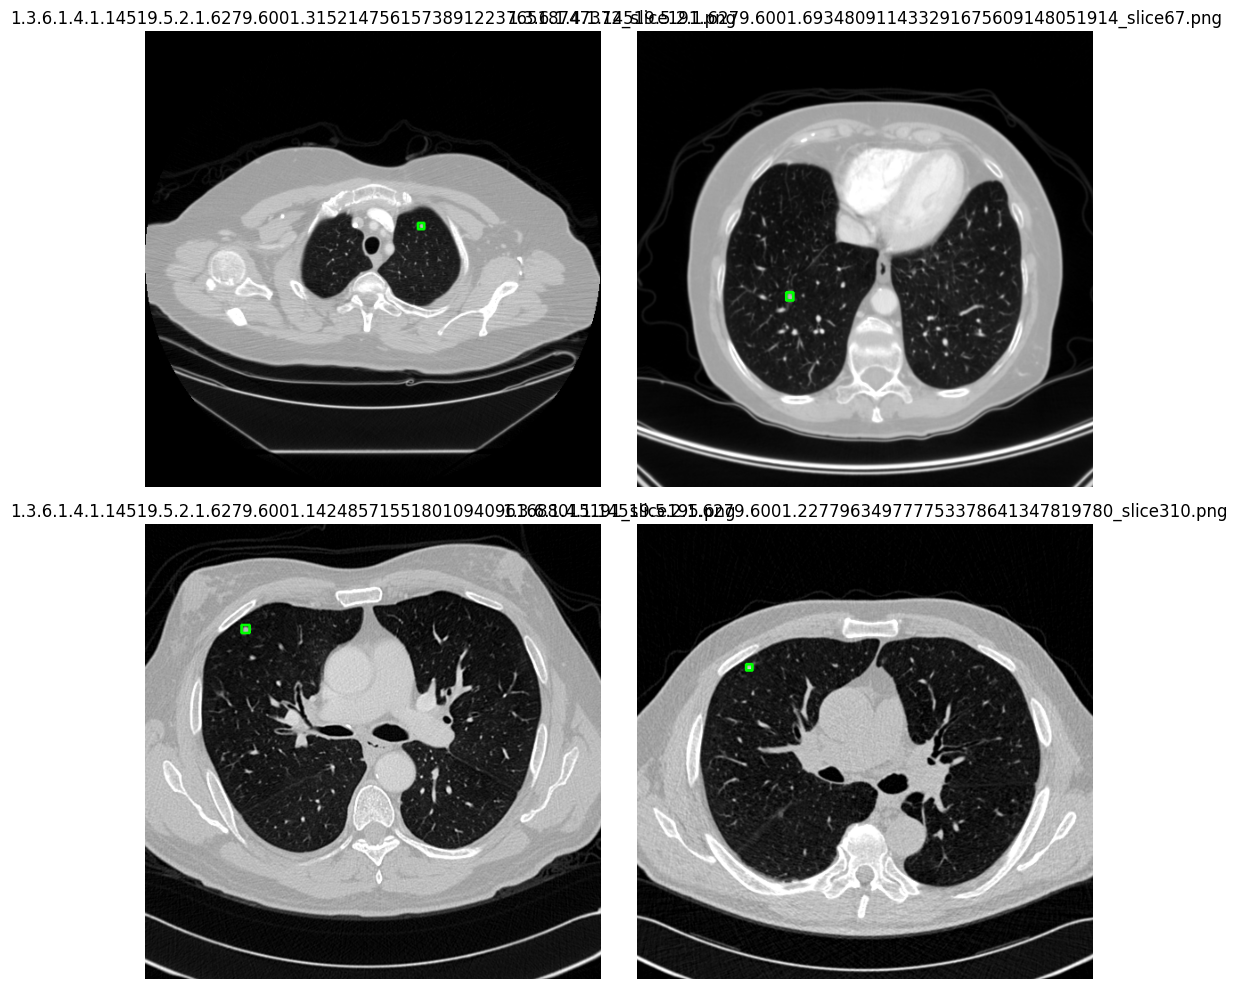

In [ ]:
import cv2
import random
import os
import matplotlib.pyplot as plt

# --- CẤU HÌNH ---
YOLO_DATA_PATH = '/content/drive/MyDrive/SIC-CAPSTONE-GROUP-4/DATATRAINING-pre/YOLOv8_Data-Training/LUNA16_YOLO_Format'
# ---

# Chọn một vài ảnh ngẫu nhiên từ tập huấn luyện
train_img_dir = os.path.join(YOLO_DATA_PATH, 'train/images')
train_label_dir = os.path.join(YOLO_DATA_PATH, 'train/labels')

if not os.path.exists(train_img_dir):
    print(f"LỖI: Không tìm thấy thư mục ảnh huấn luyện tại: {train_img_dir}")
else:
    image_files = os.listdir(train_img_dir)
    if len(image_files) < 4:
        print(f"Tìm thấy ít hơn 4 ảnh, sẽ hiển thị {len(image_files)} ảnh.")
        random_images = image_files
    else:
        random_images = random.sample(image_files, 4)

    # Thiết lập plot
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))
    axs = axs.flatten()
    print("Đang vẽ ảnh và bounding box tương ứng...")

    for i, img_name in enumerate(random_images):
        img_path = os.path.join(train_img_dir, img_name)
        image = cv2.imread(img_path)
        h, w, _ = image.shape
        label_path = os.path.join(train_label_dir, os.path.splitext(img_name)[0] + '.txt')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                line = f.readline()
                parts = line.strip().split()
                x_center, y_center, width_norm, height_norm = map(float, parts[1:])
                x_min = int((x_center - width_norm / 2) * w)
                y_min = int((y_center - height_norm / 2) * h)
                x_max = int((x_center + width_norm / 2) * w)
                y_max = int((y_center + height_norm / 2) * h)
                cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)
        axs[i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        axs[i].set_title(img_name)
        axs[i].axis('off')

    plt.tight_layout()
    plt.show()

## **STAGE 3: TẠO TỆP CẤU HÌNH .yaml**

In [ ]:
import yaml

# !! Hãy chắc chắn đường dẫn này đúng !!
YOLO_FORMAT_PATH = '/content/drive/MyDrive/SIC-CAPSTONE-GROUP-4/DATATRAINING-pre/YOLOv8_Data-Training/LUNA16_YOLO_Format'

# Tạo nội dung cho tệp YAML
data_config = {
    'path': YOLO_FORMAT_PATH,
    'train': 'train/images',
    'val': 'valid/images',
    'names': {
        0: 'nodule'
    }
}

# Ghi tệp YAML
yaml_file_path = '/content/luna16_processed.yaml'
with open(yaml_file_path, 'w') as f:
    yaml.dump(data_config, f)

print(f"Tệp cấu hình '{yaml_file_path}' đã được tạo thành công.")

Tệp cấu hình '/content/luna16_processed.yaml' đã được tạo thành công.


## **FINAL STAGE: TRAIN THE MODEL.**

In [ ]:
from ultralytics import YOLO
import torch

# Giải phóng bộ nhớ cache của GPU (hữu ích khi chạy lại)
torch.cuda.empty_cache()

# Tải mô hình YOLOv8 gốc
model = YOLO('yolov8n.pt') # 'n' (nano) là bản nhỏ nhất, bạn có thể thử 's' (small) hoặc 'm' (medium)

# Bắt đầu huấn luyện!
results = model.train(
    data='/content/luna16_processed.yaml',
    epochs=100,      # Số chu kỳ huấn luyện, 100 là một khởi đầu tốt
    imgsz=640,       # Kích thước ảnh đầu vào
    batch=8,         # Giảm xuống 8 hoặc 4 nếu gặp lỗi hết bộ nhớ (CUDA out of memory)
    project='/content/drive/MyDrive/SIC-CAPSTONE-GROUP-4/YOLOv8_TRAINING_RESULTS',
    name='luna16_final_run',
    exist_ok=True    # Cho phép ghi đè lên lần chạy trước nếu có
)

print("✅ Hoàn tất quá trình huấn luyện! ✅")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


Ultralytics 8.3.173 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/luna16_processed.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=luna16_final_run, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

Model summary: 129 layers, 3,011,043 parameters, 3,011,027 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.6±0.2 ms, read: 5.4±11.3 MB/s, size: 121.4 KB)


train: Scanning /content/drive/MyDrive/SIC-CAPSTONE-GROUP-4/DATATRAINING-pre/YOLOv8_Data-Training/LUNA16_YOLO_Format/train/labels... 574 images, 0 backgrounds, 0 corrupt: 100%|██████████| 574/574 [02:50<00:00,  3.36it/s] 


train: New cache created: /content/drive/MyDrive/SIC-CAPSTONE-GROUP-4/DATATRAINING-pre/YOLOv8_Data-Training/LUNA16_YOLO_Format/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 1.2±1.4 ms, read: 12.4±16.8 MB/s, size: 115.9 KB)


val: Scanning /content/drive/MyDrive/SIC-CAPSTONE-GROUP-4/DATATRAINING-pre/YOLOv8_Data-Training/LUNA16_YOLO_Format/valid/labels... 144 images, 0 backgrounds, 0 corrupt: 100%|██████████| 144/144 [00:42<00:00,  3.40it/s]

val: New cache created: /content/drive/MyDrive/SIC-CAPSTONE-GROUP-4/DATATRAINING-pre/YOLOv8_Data-Training/LUNA16_YOLO_Format/valid/labels.cache


Plotting labels to /content/drive/MyDrive/SIC-CAPSTONE-GROUP-4/YOLOv8_TRAINING_RESULTS/luna16_final_run/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/SIC-CAPSTONE-GROUP-4/YOLOv8_TRAINING_RESULTS/luna16_final_run
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      1.08G      2.363      8.589      1.115         11        640: 100%|██████████| 72/72 [00:17<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.88it/s]

                   all        144        144   0.000231     0.0694   0.000125   6.79e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      1.33G       2.18      5.395      1.025          5        640: 100%|██████████| 72/72 [00:15<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.70it/s]


                   all        144        144      0.303      0.347        0.2     0.0763

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      1.35G      2.187      4.491      1.059          7        640: 100%|██████████| 72/72 [00:15<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  4.91it/s]


                   all        144        144      0.669      0.417      0.497      0.224

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      1.37G      2.113      3.759      1.014          7        640: 100%|██████████| 72/72 [00:15<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.47it/s]


                   all        144        144      0.559      0.485      0.458       0.15

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      1.38G      2.007      2.879      1.028          8        640: 100%|██████████| 72/72 [00:14<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.58it/s]


                   all        144        144      0.396      0.436      0.322       0.12

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100       1.4G      2.032      2.373      0.999          7        640: 100%|██████████| 72/72 [00:14<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.53it/s]

                   all        144        144      0.648      0.562      0.532      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      1.42G      1.914      2.113     0.9877          8        640: 100%|██████████| 72/72 [00:14<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.02it/s]


                   all        144        144      0.645      0.611      0.618      0.245

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      1.44G      2.003      1.997      1.009          6        640: 100%|██████████| 72/72 [00:15<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  4.81it/s]


                   all        144        144      0.738      0.626      0.673       0.24

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      1.45G      1.905      1.822     0.9669          7        640: 100%|██████████| 72/72 [00:14<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.50it/s]

                   all        144        144      0.727      0.609      0.697      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      1.47G      1.913      1.589     0.9663          9        640: 100%|██████████| 72/72 [00:14<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.77it/s]

                   all        144        144      0.722      0.596      0.675      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      1.49G      1.893      1.738     0.9801          5        640: 100%|██████████| 72/72 [00:14<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.36it/s]

                   all        144        144       0.57      0.569      0.581      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      1.51G      1.823      1.552     0.9572          5        640: 100%|██████████| 72/72 [00:14<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  4.54it/s]

                   all        144        144      0.639      0.591      0.613      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      1.52G      1.861      1.627     0.9802          4        640: 100%|██████████| 72/72 [00:14<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.69it/s]

                   all        144        144      0.684      0.625      0.698      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      1.54G      1.879      1.538      1.003          9        640: 100%|██████████| 72/72 [00:15<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.86it/s]

                   all        144        144       0.69      0.664      0.662      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      1.56G       1.75      1.492     0.9361          8        640: 100%|██████████| 72/72 [00:14<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.14it/s]

                   all        144        144      0.648      0.667      0.646       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      1.57G      1.792      1.408     0.9536          7        640: 100%|██████████| 72/72 [00:14<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.98it/s]

                   all        144        144      0.674      0.639      0.658        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      1.59G      1.773      1.417      0.964         12        640: 100%|██████████| 72/72 [00:15<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.15it/s]

                   all        144        144      0.645      0.674      0.701      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      1.61G      1.751      1.394     0.9485          7        640: 100%|██████████| 72/72 [00:15<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.11it/s]

                   all        144        144      0.687      0.632      0.706      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      1.62G      1.868      1.476     0.9693          5        640: 100%|██████████| 72/72 [00:15<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.27it/s]

                   all        144        144      0.705      0.615       0.67      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      1.64G      1.801      1.349     0.9496          8        640: 100%|██████████| 72/72 [00:14<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.02it/s]

                   all        144        144      0.708      0.624      0.673      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      1.66G       1.74      1.404     0.9375          8        640: 100%|██████████| 72/72 [00:15<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.82it/s]

                   all        144        144      0.726       0.59      0.693      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      1.68G      1.777      1.403     0.9565         11        640: 100%|██████████| 72/72 [00:15<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.16it/s]

                   all        144        144      0.789      0.621      0.727      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      1.69G      1.723      1.255       0.95         11        640: 100%|██████████| 72/72 [00:15<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.27it/s]

                   all        144        144      0.673      0.715      0.706      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      1.71G      1.711       1.21     0.9735          9        640: 100%|██████████| 72/72 [00:14<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.17it/s]

                   all        144        144       0.68      0.667       0.68      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      1.73G       1.76      1.301     0.9675          7        640: 100%|██████████| 72/72 [00:15<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.41it/s]

                   all        144        144      0.795      0.648      0.712      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      1.74G      1.735      1.327     0.9233          7        640: 100%|██████████| 72/72 [00:15<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.45it/s]

                   all        144        144      0.808        0.7      0.768      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      1.76G      1.718      1.213     0.9394         10        640: 100%|██████████| 72/72 [00:15<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.43it/s]

                   all        144        144      0.749      0.706      0.717      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      1.78G      1.619      1.199     0.9444          3        640: 100%|██████████| 72/72 [00:15<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.48it/s]

                   all        144        144      0.844      0.715      0.798      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      1.79G      1.719      1.188     0.9158         10        640: 100%|██████████| 72/72 [00:15<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.26it/s]

                   all        144        144      0.679      0.674      0.694      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      1.81G      1.755      1.263     0.9301         11        640: 100%|██████████| 72/72 [00:15<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.42it/s]

                   all        144        144      0.704      0.694      0.733      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      1.83G      1.722      1.256     0.9531          8        640: 100%|██████████| 72/72 [00:14<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  4.85it/s]

                   all        144        144      0.685      0.726      0.762      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      1.85G      1.672      1.174      0.925          8        640: 100%|██████████| 72/72 [00:15<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.37it/s]

                   all        144        144      0.758      0.696      0.743      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      1.86G      1.636       1.16     0.9141          7        640: 100%|██████████| 72/72 [00:15<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.44it/s]

                   all        144        144      0.767      0.694      0.724      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      1.88G      1.675      1.194     0.9277         10        640: 100%|██████████| 72/72 [00:15<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.78it/s]

                   all        144        144      0.801      0.753      0.794      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100       1.9G      1.616      1.139     0.9321         12        640: 100%|██████████| 72/72 [00:16<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.42it/s]

                   all        144        144      0.713       0.75      0.766      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      1.92G      1.581      1.101     0.9404         11        640: 100%|██████████| 72/72 [00:15<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  4.70it/s]


                   all        144        144      0.682      0.729      0.728      0.342

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      1.93G      1.611      1.104     0.9319          3        640: 100%|██████████| 72/72 [00:15<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.20it/s]

                   all        144        144      0.763      0.736      0.778       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      1.95G      1.581        1.1     0.9222          4        640: 100%|██████████| 72/72 [00:15<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.07it/s]

                   all        144        144      0.787      0.688       0.76      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      1.97G      1.619      1.113     0.9453          9        640: 100%|██████████| 72/72 [00:15<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.22it/s]

                   all        144        144      0.723      0.722      0.786      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      1.98G      1.578      1.072     0.9102          7        640: 100%|██████████| 72/72 [00:15<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.26it/s]

                   all        144        144      0.683      0.779      0.767      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100         2G      1.615      1.136     0.9123          4        640: 100%|██████████| 72/72 [00:15<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.56it/s]

                   all        144        144      0.722      0.708      0.774      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.02G      1.571      1.041      0.922          4        640: 100%|██████████| 72/72 [00:15<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.71it/s]

                   all        144        144      0.734      0.764      0.793      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.04G      1.551      1.041     0.8886          9        640: 100%|██████████| 72/72 [00:15<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.29it/s]

                   all        144        144      0.739      0.701      0.777      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.05G      1.598        1.1     0.9055          5        640: 100%|██████████| 72/72 [00:15<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.40it/s]

                   all        144        144      0.813      0.694      0.781      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.07G      1.559     0.9831     0.9116         13        640: 100%|██████████| 72/72 [00:15<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.16it/s]

                   all        144        144      0.677      0.812      0.763      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.09G      1.607       1.05     0.9317          8        640: 100%|██████████| 72/72 [00:15<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.41it/s]

                   all        144        144      0.703      0.764      0.764      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100       2.1G      1.553     0.9966     0.9192          9        640: 100%|██████████| 72/72 [00:15<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.04it/s]

                   all        144        144      0.795      0.674      0.766      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.12G      1.612      1.072     0.9213         11        640: 100%|██████████| 72/72 [00:15<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.96it/s]

                   all        144        144      0.756      0.712       0.76      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.14G      1.488     0.9917     0.9053         10        640: 100%|██████████| 72/72 [00:15<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.98it/s]

                   all        144        144      0.711      0.753      0.765      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.15G      1.593     0.9588     0.9214          8        640: 100%|██████████| 72/72 [00:15<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.77it/s]

                   all        144        144       0.78      0.799      0.804        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.17G      1.504     0.9898     0.8868          4        640: 100%|██████████| 72/72 [00:15<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.63it/s]

                   all        144        144      0.759      0.812       0.82       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.19G      1.502     0.9565      0.927          3        640: 100%|██████████| 72/72 [00:16<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.67it/s]


                   all        144        144       0.76      0.799      0.807      0.395

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.21G      1.589     0.9642     0.9116          6        640: 100%|██████████| 72/72 [00:15<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.28it/s]

                   all        144        144        0.8      0.771      0.807      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.22G      1.562     0.9917      0.897         10        640: 100%|██████████| 72/72 [00:15<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.13it/s]

                   all        144        144      0.775      0.791      0.791      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.24G      1.489     0.9731     0.9067         11        640: 100%|██████████| 72/72 [00:14<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.18it/s]

                   all        144        144      0.794      0.792      0.816      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.26G      1.514     0.9974     0.8828          9        640: 100%|██████████| 72/72 [00:14<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  4.63it/s]

                   all        144        144       0.77      0.785        0.8       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.27G      1.499     0.9985     0.8842          6        640: 100%|██████████| 72/72 [00:15<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  4.80it/s]

                   all        144        144      0.799      0.743      0.819      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.29G       1.49     0.9711     0.8931          9        640: 100%|██████████| 72/72 [00:14<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.35it/s]

                   all        144        144      0.773      0.852      0.821      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.31G      1.438     0.8719      0.913         10        640: 100%|██████████| 72/72 [00:14<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.53it/s]

                   all        144        144      0.755      0.815      0.818      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.32G       1.51     0.9205     0.8976          5        640: 100%|██████████| 72/72 [00:14<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.70it/s]

                   all        144        144      0.776       0.77      0.806      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.34G      1.436     0.8989     0.9011          6        640: 100%|██████████| 72/72 [00:14<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.42it/s]

                   all        144        144      0.773      0.792      0.785      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.36G      1.498     0.9337     0.9123          6        640: 100%|██████████| 72/72 [00:14<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.12it/s]

                   all        144        144      0.752      0.743      0.765      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.38G      1.405     0.8863     0.8925          6        640: 100%|██████████| 72/72 [00:14<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.55it/s]

                   all        144        144      0.745      0.792      0.783      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.39G       1.45     0.9081      0.898          8        640: 100%|██████████| 72/72 [00:14<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.20it/s]

                   all        144        144      0.742      0.792      0.795      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.41G      1.444      0.907     0.8987          6        640: 100%|██████████| 72/72 [00:14<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.66it/s]


                   all        144        144      0.812      0.749      0.785      0.394

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.43G      1.415     0.9097      0.897          7        640: 100%|██████████| 72/72 [00:14<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.88it/s]

                   all        144        144      0.704      0.799      0.776      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.45G      1.423     0.8709     0.9152          9        640: 100%|██████████| 72/72 [00:14<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.41it/s]

                   all        144        144      0.749      0.705      0.771       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.46G      1.376     0.8813     0.8914          9        640: 100%|██████████| 72/72 [00:14<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.22it/s]

                   all        144        144      0.771       0.75      0.773      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.48G      1.412     0.8644     0.8792          3        640: 100%|██████████| 72/72 [00:14<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.94it/s]

                   all        144        144      0.762      0.792      0.799       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100       2.5G      1.495     0.9082     0.8926          4        640: 100%|██████████| 72/72 [00:14<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.63it/s]

                   all        144        144      0.701      0.765      0.762      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.51G      1.338     0.8567     0.8859          9        640: 100%|██████████| 72/72 [00:14<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.06it/s]

                   all        144        144      0.786      0.722      0.761      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.53G      1.384     0.9071     0.8788         11        640: 100%|██████████| 72/72 [00:14<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.11it/s]

                   all        144        144      0.767      0.709      0.763      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.55G       1.47     0.9052     0.8712         12        640: 100%|██████████| 72/72 [00:14<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.81it/s]

                   all        144        144      0.748      0.806      0.791      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.56G      1.362     0.8436     0.8765          8        640: 100%|██████████| 72/72 [00:14<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.13it/s]

                   all        144        144      0.781      0.812      0.789       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.58G      1.415     0.8771     0.8758          4        640: 100%|██████████| 72/72 [00:14<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.44it/s]

                   all        144        144       0.78      0.715      0.763      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100       2.6G      1.372     0.8164     0.8914          9        640: 100%|██████████| 72/72 [00:14<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.51it/s]

                   all        144        144      0.743      0.763      0.772      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.62G      1.385     0.8539     0.8727         10        640: 100%|██████████| 72/72 [00:14<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.18it/s]

                   all        144        144      0.784      0.729      0.768      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.63G      1.369     0.8236      0.871          6        640: 100%|██████████| 72/72 [00:14<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.11it/s]

                   all        144        144      0.768      0.806      0.791      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.65G      1.306     0.7709     0.8716          8        640: 100%|██████████| 72/72 [00:14<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.01it/s]

                   all        144        144      0.813      0.736      0.789      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.67G      1.393     0.8332     0.8775         12        640: 100%|██████████| 72/72 [00:14<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.98it/s]

                   all        144        144      0.772      0.775      0.788      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.68G      1.291     0.7617     0.8513         10        640: 100%|██████████| 72/72 [00:15<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.82it/s]

                   all        144        144      0.734      0.786      0.786      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100       2.7G      1.346     0.7897     0.8842          8        640: 100%|██████████| 72/72 [00:14<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.55it/s]

                   all        144        144      0.794      0.805      0.808      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.72G      1.272     0.8196     0.8903          6        640: 100%|██████████| 72/72 [00:14<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  4.87it/s]


                   all        144        144      0.816      0.803      0.821      0.412

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.73G       1.29     0.7795     0.8699          6        640: 100%|██████████| 72/72 [00:14<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.64it/s]

                   all        144        144      0.791      0.799      0.813      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.75G      1.317     0.7959     0.8734          7        640: 100%|██████████| 72/72 [00:14<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.51it/s]

                   all        144        144      0.785       0.81      0.803      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.77G      1.379     0.8163     0.8652         12        640: 100%|██████████| 72/72 [00:14<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.54it/s]

                   all        144        144      0.788      0.833      0.811      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.79G      1.264     0.7669     0.8605          6        640: 100%|██████████| 72/72 [00:14<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.48it/s]

                   all        144        144      0.779      0.806      0.807      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100       2.8G      1.256     0.7722     0.8558         11        640: 100%|██████████| 72/72 [00:14<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.96it/s]

                   all        144        144      0.764      0.799      0.811      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.82G      1.238     0.7052     0.8518          7        640: 100%|██████████| 72/72 [00:14<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  6.11it/s]

                   all        144        144      0.789      0.805      0.804       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.84G      1.285     0.7159     0.8633          9        640: 100%|██████████| 72/72 [00:14<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.47it/s]

                   all        144        144      0.786      0.767      0.803      0.419


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.85G      1.257     0.7094     0.8697          6        640: 100%|██████████| 72/72 [00:15<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.61it/s]

                   all        144        144      0.753      0.782      0.791      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.87G      1.273       0.72     0.8793          6        640: 100%|██████████| 72/72 [00:14<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.71it/s]

                   all        144        144      0.769      0.787      0.801      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.88G      1.212     0.6684     0.8723          6        640: 100%|██████████| 72/72 [00:14<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.09it/s]

                   all        144        144      0.785      0.799      0.788      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100       2.9G      1.191     0.6776     0.8686          5        640: 100%|██████████| 72/72 [00:14<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.12it/s]

                   all        144        144       0.78      0.811      0.784      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.92G      1.174     0.6782     0.8589          6        640: 100%|██████████| 72/72 [00:14<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.14it/s]

                   all        144        144      0.769      0.792       0.79      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.94G      1.206     0.6808     0.8753          6        640: 100%|██████████| 72/72 [00:14<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.38it/s]


                   all        144        144      0.817      0.764      0.789      0.418

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.95G      1.178     0.6849     0.8463          6        640: 100%|██████████| 72/72 [00:14<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.55it/s]

                   all        144        144      0.807      0.756      0.795      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.97G      1.187     0.6579     0.8674          5        640: 100%|██████████| 72/72 [00:14<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.59it/s]

                   all        144        144        0.8      0.777      0.794       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.99G      1.151     0.6542     0.8613          6        640: 100%|██████████| 72/72 [00:14<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.27it/s]

                   all        144        144      0.806      0.757      0.797      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100         3G      1.142     0.6396     0.8452          6        640: 100%|██████████| 72/72 [00:14<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.40it/s]

                   all        144        144      0.801      0.743      0.797      0.422



100 epochs completed in 0.484 hours.
Optimizer stripped from /content/drive/MyDrive/SIC-CAPSTONE-GROUP-4/YOLOv8_TRAINING_RESULTS/luna16_final_run/weights/last.pt, 6.3MB
Optimizer stripped from /content/drive/MyDrive/SIC-CAPSTONE-GROUP-4/YOLOv8_TRAINING_RESULTS/luna16_final_run/weights/best.pt, 6.3MB

Validating /content/drive/MyDrive/SIC-CAPSTONE-GROUP-4/YOLOv8_TRAINING_RESULTS/luna16_final_run/weights/best.pt...
Ultralytics 8.3.173 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.97it/s]


                   all        144        144      0.795      0.807      0.809      0.447
Speed: 0.3ms preprocess, 4.8ms inference, 0.0ms loss, 4.9ms postprocess per image
Results saved to /content/drive/MyDrive/SIC-CAPSTONE-GROUP-4/YOLOv8_TRAINING_RESULTS/luna16_final_run
🎉 Hoàn tất quá trình huấn luyện! 🎉


## **TESTING**


image 1/1 /content/drive/MyDrive/SIC-CAPSTONE-GROUP-4/DATATRAINING-pre/YOLOv8_Data-Training/LUNA16_YOLO_Format/valid/images/1.3.6.1.4.1.14519.5.2.1.6279.6001.107351566259572521472765997306_slice96.png: 640x640 1 nodule, 12.7ms
Speed: 8.2ms preprocess, 12.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


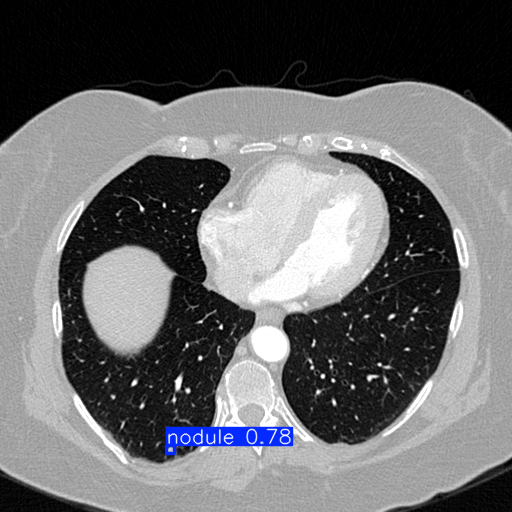

In [20]:
from ultralytics import YOLO
from PIL import Image

# 1. Install Mô hình đã được huấn luyện 'best.pt'
model = YOLO('/content/drive/MyDrive/SIC-CAPSTONE-GROUP-4/YOLOv8_TRAINING_RESULTS/luna16_final_run/weights/best.pt')

# 2. Cung cấp đường dẫn đến ảnh thử nghiệm
path_to_test_image = '/content/drive/MyDrive/SIC-CAPSTONE-GROUP-4/DATATRAINING-pre/YOLOv8_Data-Training/LUNA16_YOLO_Format/valid/images/1.3.6.1.4.1.14519.5.2.1.6279.6001.107351566259572521472765997306_slice96.png'

# 3. Thực hiện dự đoán
results = model(path_to_test_image)

# 4. Hiển thị kết quả
# YOLOv8 tự động lưu ảnh kết quả vào thư mục runs/detect/predict.
for r in results:
    im_array = r.plot()
    im = Image.fromarray(im_array[..., ::-1])
    display(im)

## **CHUYỂN ĐỔI .pt SANG .onnx ĐỂ TÍCH HỢP VÀO WEBSITE.**

In [ ]:
from ultralytics import YOLO

# Tải mô hình best.pt
model = YOLO('/content/drive/MyDrive/SIC-CAPSTONE-GROUP-4/YOLOv8_TRAINING_RESULTS/luna16_final_run/weights/best.pt')

# Thực hiện chuyển đổi sang định dạng ONNX
# Tệp .onnx sẽ được lưu trong cùng thư mục với tệp best.pt
model.export(format='onnx')

print("\n ✅ Hoàn tất! Tệp 'best.onnx' đã được tạo thành công. ✅")
print("Bạn có thể tìm thấy nó trong thư mục .../weights/ của lần chạy vừa rồi.")

Ultralytics 8.3.173 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.00GHz)
💡 ProTip: Export to OpenVINO format for best performance on Intel hardware. Learn more at https://docs.ultralytics.com/integrations/openvino/
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from '/content/drive/MyDrive/SIC-CAPSTONE-GROUP-4/YOLOv8_TRAINING_RESULTS/luna16_final_run/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (6.0 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0,<1.18.0', 'onnxslim>=0.1.59', 'onnxruntime-gpu'] not found, attempting AutoUpdate...

requirements: AutoUpdate success ✅ 8.4s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.62...
ONNX: export success ✅ 10.9s, saved as '/content/drive/MyDrive/SIC-CAPSTONE-GROUP-4/YOLOv8_TRAINING_RESULTS/luna16_final_run/weights/

# ***U-Net Model***

**1. Cài đặt thư viện**

In [2]:
!pip install kaggle pydicom -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 36.7 MB/s eta 0:00:00


**2. Thiết lập môi trường**

In [3]:
import os
from google.colab import drive
import pandas as pd
import numpy as np
import pydicom
from skimage.transform import resize
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import glob
import tensorflow as tf

# Kết nối Google Drive
print("▶️ Kết nối Google Drive...")
drive.mount('/content/drive')

# Cài đặt thư viện Pydicom
print("\n▶️ Cài đặt Pydicom...")
!pip install pydicom -q

# --- ĐƯỜNG DẪN DỮ LIỆU ---
# Đường dẫn đến dữ liệu gốc trên Google Drive của bạn
DATA_DIR_DRIVE = '/content/drive/MyDrive/SIC-CAPSTONE-GROUP-4/DATA-TRAINING/U-NET_Data-Training'
# Đường dẫn đến thư mục sẽ lưu dữ liệu đã xử lý trên bộ nhớ tạm của Colab (để truy cập nhanh)
PREPROCESSED_DIR = '/content/preprocessed_data/'
# ---

print(f"\n✅ Dữ liệu gốc từ: {DATA_DIR_DRIVE}")
print(f"✅ Dữ liệu đã xử lý sẽ được lưu tại: {PREPROCESSED_DIR}")

▶️ Kết nối Google Drive...
Mounted at /content/drive

▶️ Cài đặt Pydicom...

✅ Dữ liệu gốc từ: /content/drive/MyDrive/SIC-CAPSTONE-GROUP-4/DATA-TRAINING/U-NET_Data-Training
✅ Dữ liệu đã xử lý sẽ được lưu tại: /content/preprocessed_data/


## **Stage 1: Tiền xử lý**

In [5]:
# @title 1.1. Lọc và phân chia ID bệnh nhân
# --- Cấu hình ---
IMG_SIZE = 256
# ---

# Đọc tệp CSV
print("▶️ Đọc tệp stage_2_train_labels.csv...")
labels_df = pd.read_csv(os.path.join(DATA_DIR_DRIVE, 'stage_2_train_labels.csv'))

# Tạo dictionary bounding box
print("▶️ Tạo dictionary bounding box...")
patient_boxes = {}
pneumonia_cases = labels_df[labels_df['Target'] == 1]
for _, row in pneumonia_cases.iterrows():
    patient_id = row['patientId']
    box = [int(row['x']), int(row['y']), int(row['width']), int(row['height'])]
    if patient_id in patient_boxes:
        patient_boxes[patient_id].append(box)
    else:
        patient_boxes[patient_id] = [box]

# Lọc danh sách patientId để đảm bảo chỉ những ID có file ảnh tồn tại mới được sử dụng
print("\n▶️ Lọc danh sách Patient ID có tệp ảnh tồn tại...")
image_dir = os.path.join(DATA_DIR_DRIVE, 'stage_2_train_images')
all_patient_ids_from_csv = labels_df['patientId'].unique()
available_image_paths = glob.glob(os.path.join(image_dir, '*.dcm'))
available_patient_ids = {os.path.splitext(os.path.basename(p))[0] for p in available_image_paths}
valid_patient_ids = [pid for pid in all_patient_ids_from_csv if pid in available_patient_ids]
print(f"✅ Số lượng ID hợp lệ sẽ được dùng: {len(valid_patient_ids)}")

# Chia dữ liệu đã được lọc thành tập Train và Validation
print("\n▶️ Chia dữ liệu đã lọc thành tập Train và Validation...")
train_ids, val_ids = train_test_split(valid_patient_ids, test_size=0.2, random_state=42)
print(f"Số lượng ảnh huấn luyện: {len(train_ids)}")
print(f"Số lượng ảnh xác thực: {len(val_ids)}")

▶️ Đọc tệp stage_2_train_labels.csv...
▶️ Tạo dictionary bounding box...

▶️ Lọc danh sách Patient ID có tệp ảnh tồn tại...
✅ Số lượng ID hợp lệ sẽ được dùng: 3500

▶️ Chia dữ liệu đã lọc thành tập Train và Validation...
Số lượng ảnh huấn luyện: 2800
Số lượng ảnh xác thực: 700


In [6]:
# @title 1.2. Chạy quá trình tiền xử lý và lưu file .npy
print("▶️ Bắt đầu quá trình tiền xử lý toàn bộ dữ liệu (có thể mất một lúc)...")

# Tạo các thư mục con trong bộ nhớ tạm
os.makedirs(os.path.join(PREPROCESSED_DIR, 'train/images'), exist_ok=True)
os.makedirs(os.path.join(PREPROCESSED_DIR, 'train/masks'), exist_ok=True)
os.makedirs(os.path.join(PREPROCESSED_DIR, 'valid/images'), exist_ok=True)
os.makedirs(os.path.join(PREPROCESSED_DIR, 'valid/masks'), exist_ok=True)

def preprocess_and_save(patient_ids, patient_boxes_dict, set_name):
    print(f"\nBắt đầu xử lý và lưu tập {set_name}...")
    for patient_id in tqdm(patient_ids):
        # Đọc và resize ảnh
        dcm_path = os.path.join(DATA_DIR_DRIVE, 'stage_2_train_images', f'{patient_id}.dcm')
        image = pydicom.dcmread(dcm_path).pixel_array
        resized_image = resize(image, (IMG_SIZE, IMG_SIZE, 1), mode='symmetric', preserve_range=True)

        # Tạo và resize mask
        mask = np.zeros((1024, 1024))
        if patient_id in patient_boxes_dict:
            for box in patient_boxes_dict[patient_id]:
                x, y, w, h = box
                mask[y:y+h, x:x+w] = 1
        resized_mask = resize(mask, (IMG_SIZE, IMG_SIZE, 1), mode='symmetric', preserve_range=True)

        # Chuẩn hóa
        normalized_image = (resized_image / 255.0).astype(np.float32)
        binary_mask = (resized_mask > 0.5).astype(np.float32)

        # Lưu ra file .npy vào bộ nhớ tạm
        np.save(os.path.join(PREPROCESSED_DIR, set_name, 'images', f'{patient_id}.npy'), normalized_image)
        np.save(os.path.join(PREPROCESSED_DIR, set_name, 'masks', f'{patient_id}.npy'), binary_mask)

# Chạy cho cả tập train và validation
preprocess_and_save(train_ids, patient_boxes, 'train')
preprocess_and_save(val_ids, patient_boxes, 'valid')

print("\n✅ Hoàn tất Giai đoạn 1! Dữ liệu đã được xử lý và sẵn sàng để huấn luyện.")

▶️ Bắt đầu quá trình tiền xử lý toàn bộ dữ liệu (có thể mất một lúc)...

Bắt đầu xử lý và lưu tập train...


100%|██████████| 2800/2800 [06:19<00:00,  7.38it/s]



Bắt đầu xử lý và lưu tập valid...


100%|██████████| 700/700 [01:00<00:00, 11.58it/s]


✅ Hoàn tất Giai đoạn 1! Dữ liệu đã được xử lý và sẵn sàng để huấn luyện.


## **Stage 2: Quy trình Huấn luyện (High Speed)**

In [7]:
# @title 2.1. Tạo Data Generator đọc file .npy
def data_generator_npy(patient_ids, set_name, batch_size=16):
    base_dir = os.path.join(PREPROCESSED_DIR, set_name)
    image_dir = os.path.join(base_dir, 'images')
    mask_dir = os.path.join(base_dir, 'masks')

    ids_to_use = [pid for pid in patient_ids if os.path.exists(os.path.join(image_dir, f'{pid}.npy'))]

    while True:
        np.random.shuffle(ids_to_use)
        for i in range(0, len(ids_to_use), batch_size):
            batch_ids = ids_to_use[i:i+batch_size]
            batch_images = np.zeros((len(batch_ids), IMG_SIZE, IMG_SIZE, 1), dtype=np.float32)
            batch_masks = np.zeros((len(batch_ids), IMG_SIZE, IMG_SIZE, 1), dtype=np.float32)

            for j, patient_id in enumerate(batch_ids):
                batch_images[j] = np.load(os.path.join(image_dir, f'{patient_id}.npy'))
                batch_masks[j] = np.load(os.path.join(mask_dir, f'{patient_id}.npy'))

            yield batch_images, batch_masks

# Tạo các generator mới
BATCH_SIZE = 16
train_gen = data_generator_npy(train_ids, 'train', batch_size=BATCH_SIZE)
val_gen = data_generator_npy(val_ids, 'valid', batch_size=BATCH_SIZE)
print("✅ Đã tạo Data Generator tốc độ cao.")

✅ Đã tạo Data Generator tốc độ cao.


In [8]:
# @title 2.2. Xây dựng và Biên dịch mô hình
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Conv2DTranspose, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Kiểm tra GPU
gpu_devices = tf.config.list_physical_devices('GPU')
if gpu_devices:
    print("✅ GPU đã được bật và sẵn sàng:", gpu_devices)
else:
    print("❌ CẢNH BÁO: Không tìm thấy GPU. Tốc độ sẽ rất chậm.")

# Xây dựng mô hình U-Net (giữ nguyên)
def build_unet(input_shape):
    inputs = Input(input_shape)
    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(inputs)
    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)
    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)
    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
    u4 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c3)
    u4 = concatenate([u4, c2])
    c4 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u4)
    c4 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
    u5 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c4)
    u5 = concatenate([u5, c1])
    c5 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u5)
    c5 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)
    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c5)
    return Model(inputs=[inputs], outputs=[outputs])

# Định nghĩa Dice Coefficient và Dice Loss
def dice_coef(y_true, y_pred, smooth=1):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def dice_loss(y_true, y_pred):
    return 1 - dice_coef(y_true, y_pred)

# Khởi tạo và biên dịch mô hình
model = build_unet((IMG_SIZE, IMG_SIZE, 1))
model.compile(optimizer=Adam(learning_rate=1e-4), loss=dice_loss, metrics=[dice_coef, 'binary_accuracy'])
print("\n✅ Mô hình đã được xây dựng và biên dịch.")

✅ GPU đã được bật và sẵn sàng: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

✅ Mô hình đã được xây dựng và biên dịch.


In [9]:
# @title 2.3. Huấn luyện mô hình
# Thiết lập Callbacks để lưu model tốt nhất
MODEL_SAVE_PATH = os.path.join(DATA_DIR_DRIVE, 'unet_rsna_best_fast.keras')
checkpoint = ModelCheckpoint(MODEL_SAVE_PATH, monitor='val_dice_coef', mode='max', save_best_only=True, verbose=1)
early_stopping = EarlyStopping(monitor='val_dice_coef', mode='max', patience=5, verbose=1)

print("\n▶️ Bắt đầu huấn luyện tốc độ cao...")
history = model.fit(
    train_gen,
    steps_per_epoch=len(train_ids) // BATCH_SIZE,
    epochs=25,
    validation_data=val_gen,
    validation_steps=len(val_ids) // BATCH_SIZE,
    callbacks=[checkpoint, early_stopping]
)
print("\n✅✅✅ HOÀN TẤT QUÁ TRÌNH HUẤN LUYỆN! ✅✅✅")


▶️ Bắt đầu huấn luyện tốc độ cao...
Epoch 1/25
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - binary_accuracy: 0.0675 - dice_coef: 0.0238 - loss: 0.9762
Epoch 1: val_dice_coef improved from -inf to 0.00789, saving model to /content/drive/MyDrive/SIC-CAPSTONE-GROUP-4/DATA-TRAINING/U-NET_Data-Training/unet_rsna_best_fast.keras
175/175 ━━━━━━━━━━━━━━━━━━━━ 34s 115ms/step - binary_accuracy: 0.0683 - dice_coef: 0.0238 - loss: 0.9762 - val_binary_accuracy: 0.9890 - val_dice_coef: 0.0079 - val_loss: 0.9921
Epoch 2/25
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - binary_accuracy: 0.5919 - dice_coef: 0.0363 - loss: 0.9637
Epoch 2: val_dice_coef improved from 0.00789 to 0.04086, saving model to /content/drive/MyDrive/SIC-CAPSTONE-GROUP-4/DATA-TRAINING/U-NET_Data-Training/unet_rsna_best_fast.keras
175/175 ━━━━━━━━━━━━━━━━━━━━ 18s 104ms/step - binary_accuracy: 0.5922 - dice_coef: 0.0363 - loss: 0.9637 - val_binary_accuracy: 0.5342 - val_dice_coef: 0.0409 - val_loss: 0.9591
Epoch 3/25
175/175 ━━━━━━━━━

## **Stage 3: Đánh giá và Dự đoán**

In [11]:
# @title 3.1. Đánh giá mô hình trên tập Validation
import tensorflow as tf
from tensorflow.keras import backend as K
import os

# --- Định nghĩa lại các hàm custom để tải model ---
def dice_coef(y_true, y_pred, smooth=1):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def dice_loss(y_true, y_pred):
    return 1 - dice_coef(y_true, y_pred)
# ---

# 1. Tải mô hình tốt nhất đã lưu
print("▶️ Tải mô hình tốt nhất đã lưu...")
MODEL_SAVE_PATH = os.path.join(DATA_DIR_DRIVE, 'unet_rsna_best_fast.keras')
# Cung cấp các hàm custom để Keras có thể nhận diện
best_model = tf.keras.models.load_model(
    MODEL_SAVE_PATH,
    custom_objects={'dice_loss': dice_loss, 'dice_coef': dice_coef}
)
print("✅ Tải mô hình thành công.")

# 2. Thực hiện đánh giá
print("\n▶️ Bắt đầu đánh giá trên tập validation...")
# Sử dụng val_gen đã tạo ở giai đoạn trước
# val_ids và BATCH_SIZE cũng là các biến đã có từ trước
validation_steps = len(val_ids) // BATCH_SIZE
if validation_steps == 0:
    validation_steps = 1 # Đảm bảo chạy ít nhất 1 bước nếu tập val quá nhỏ

results = best_model.evaluate(val_gen, steps=validation_steps)

print("\n--- KẾT QUẢ ĐÁNH GIÁ CUỐI CÙNG ---")
print(f"Validation Loss      : {results[0]:.4f}")
print(f"Validation Dice Coef : {results[1]:.4f}")
print(f"Validation Accuracy  : {results[2]:.4f}")
print("-----------------------------------")

▶️ Tải mô hình tốt nhất đã lưu...
✅ Tải mô hình thành công.

▶️ Bắt đầu đánh giá trên tập validation...
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - binary_accuracy: 0.9865 - dice_coef: 0.0789 - loss: 0.9208

--- KẾT QUẢ ĐÁNH GIÁ CUỐI CÙNG ---
Validation Loss      : 0.9063
Validation Dice Coef : 0.0932
Validation Accuracy  : 0.9886
-----------------------------------


▶️ Lấy dữ liệu mẫu để dự đoán...
▶️ Thực hiện dự đoán...
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step
▶️ Hiển thị kết quả so sánh...


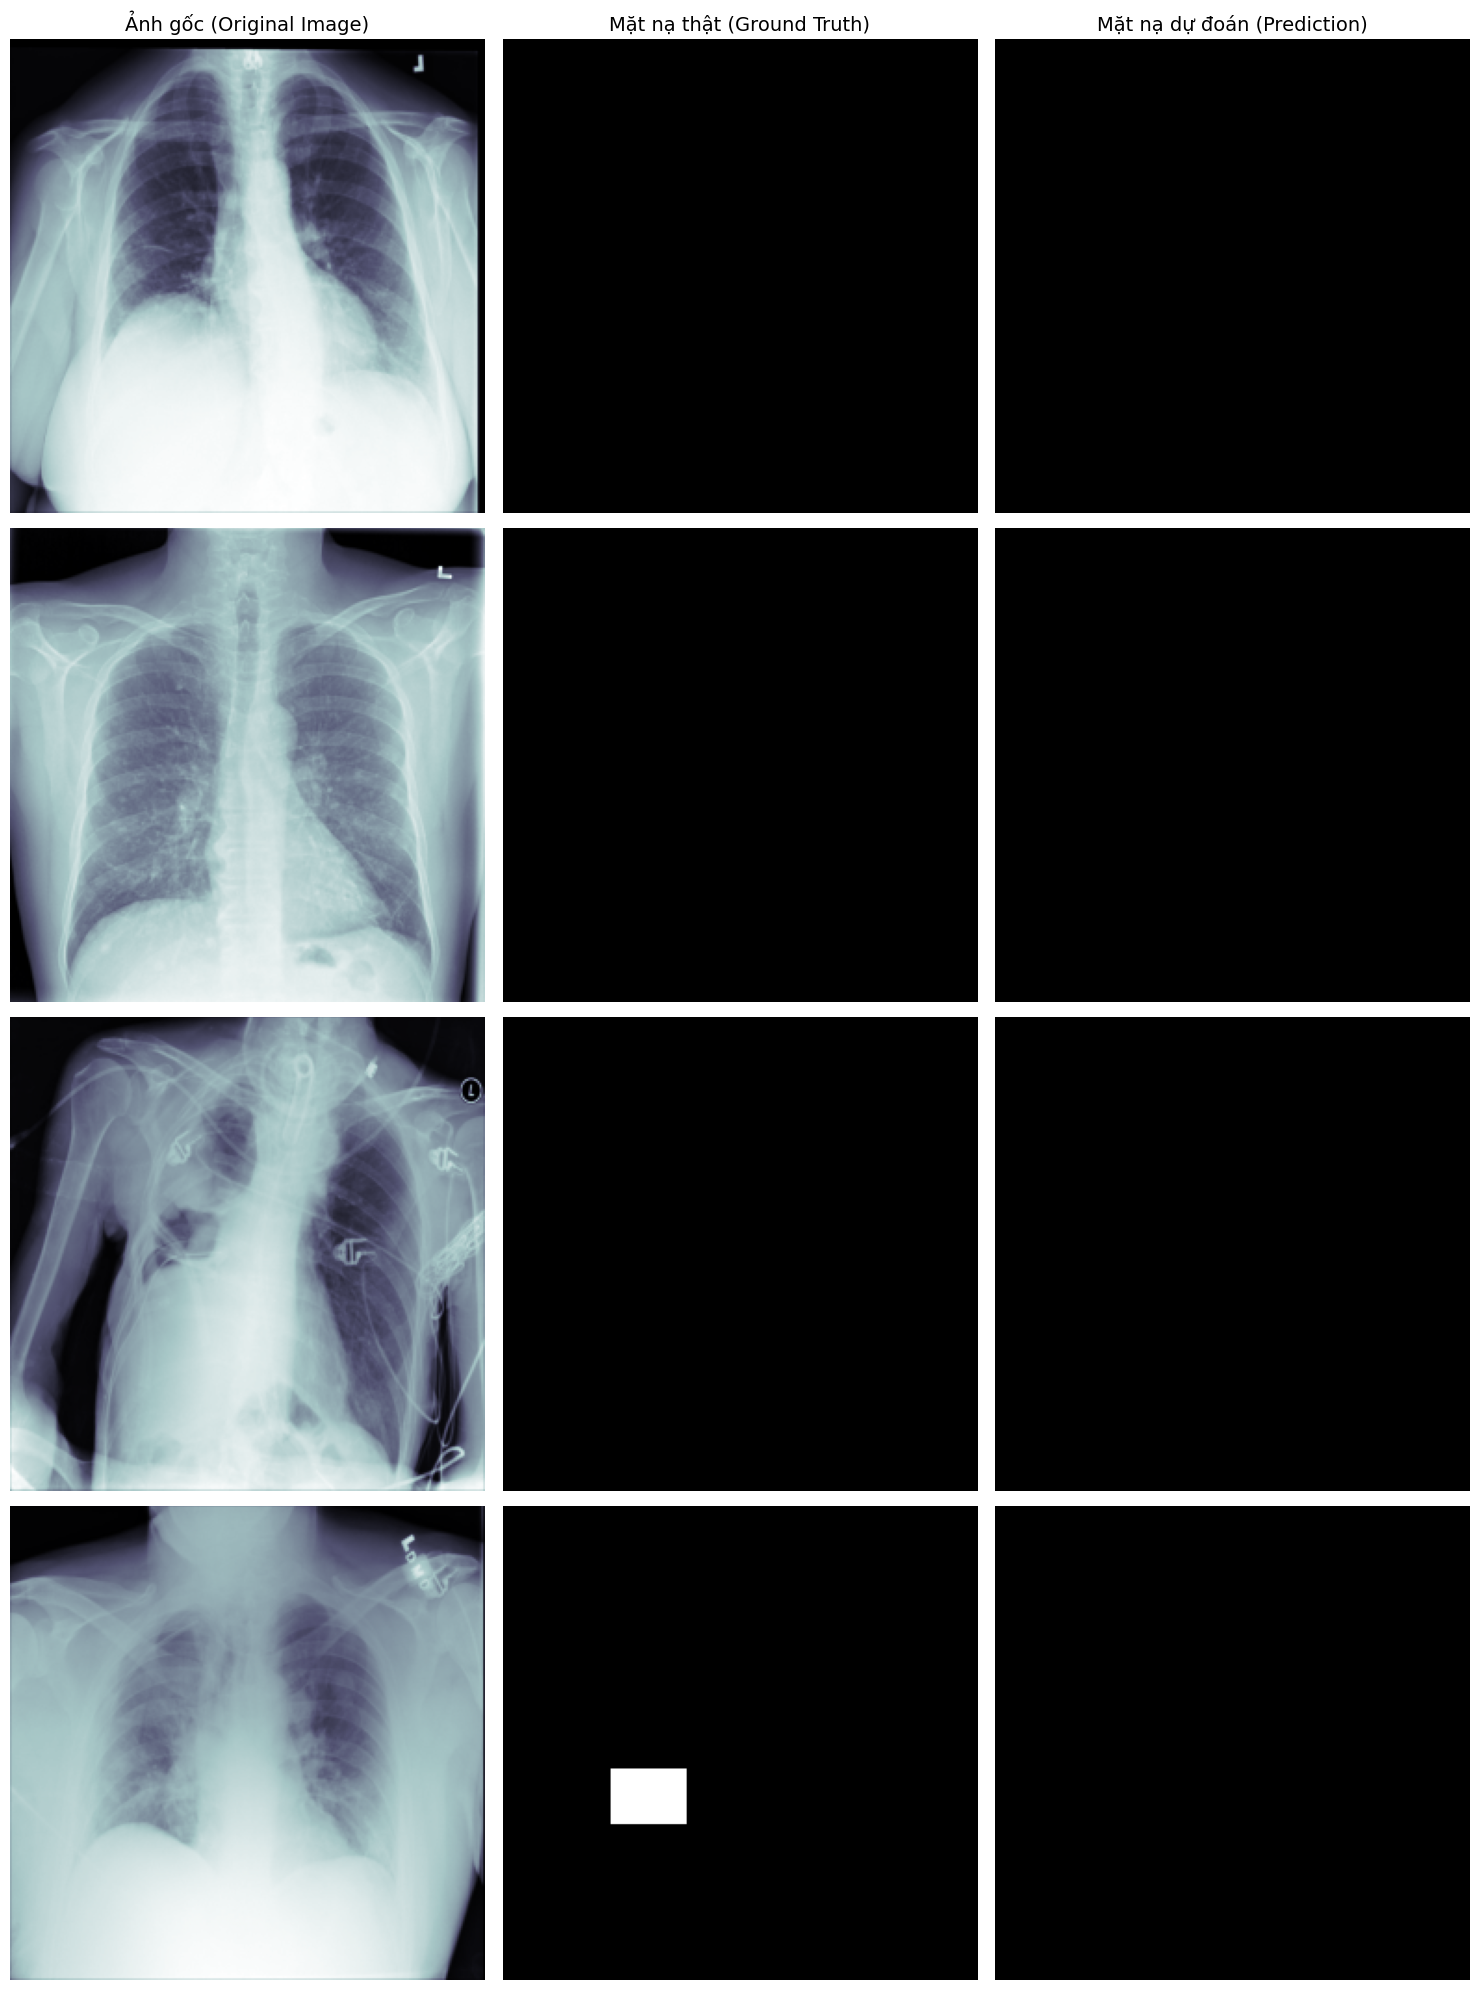

In [12]:
# @title 3.2. Dự đoán và Trực quan hóa
import matplotlib.pyplot as plt

# 1. Lấy một batch dữ liệu từ tập validation để kiểm tra
print("▶️ Lấy dữ liệu mẫu để dự đoán...")
val_images, val_masks_true = next(val_gen)

# 2. Thực hiện dự đoán
print("▶️ Thực hiện dự đoán...")
val_masks_pred = best_model.predict(val_images)

# 3. Hiển thị kết quả so sánh
print("▶️ Hiển thị kết quả so sánh...")
n_samples = 4 # Số lượng mẫu muốn hiển thị
fig, axes = plt.subplots(n_samples, 3, figsize=(15, n_samples * 5))

# Đặt tiêu đề cho các cột
axes[0, 0].set_title("Ảnh gốc (Original Image)", fontsize=14)
axes[0, 1].set_title("Mặt nạ thật (Ground Truth)", fontsize=14)
axes[0, 2].set_title("Mặt nạ dự đoán (Prediction)", fontsize=14)

for i in range(n_samples):
    # Hiển thị ảnh gốc
    axes[i, 0].imshow(val_images[i].squeeze(), cmap='bone')
    axes[i, 0].axis('off')

    # Hiển thị mặt nạ thật
    axes[i, 1].imshow(val_masks_true[i].squeeze(), cmap='gray')
    axes[i, 1].axis('off')

    # Hiển thị mặt nạ dự đoán với ngưỡng 0.5 để chuyển thành ảnh đen trắng
    axes[i, 2].imshow(val_masks_pred[i].squeeze() > 0.5, cmap='gray')
    axes[i, 2].axis('off')

plt.tight_layout()
plt.show()

## **Stage 4: Testing Report**

TRỰC QUAN HÓA BÁO CÁO KẾT QUẢ U-NET

▶️ 1. Tải mô hình tốt nhất...
✅ Tải mô hình thành công.

▶️ 2. Đánh giá định lượng trên tập Validation...

--- Bảng kết quả định lượng ---
                     Metric  Score
            Validation Loss 0.9297
Validation Dice Coefficient 0.0699
 Validation Binary Accuracy 0.9891
--------------------------------


▶️ 3. Vẽ biểu đồ lịch sử huấn luyện...


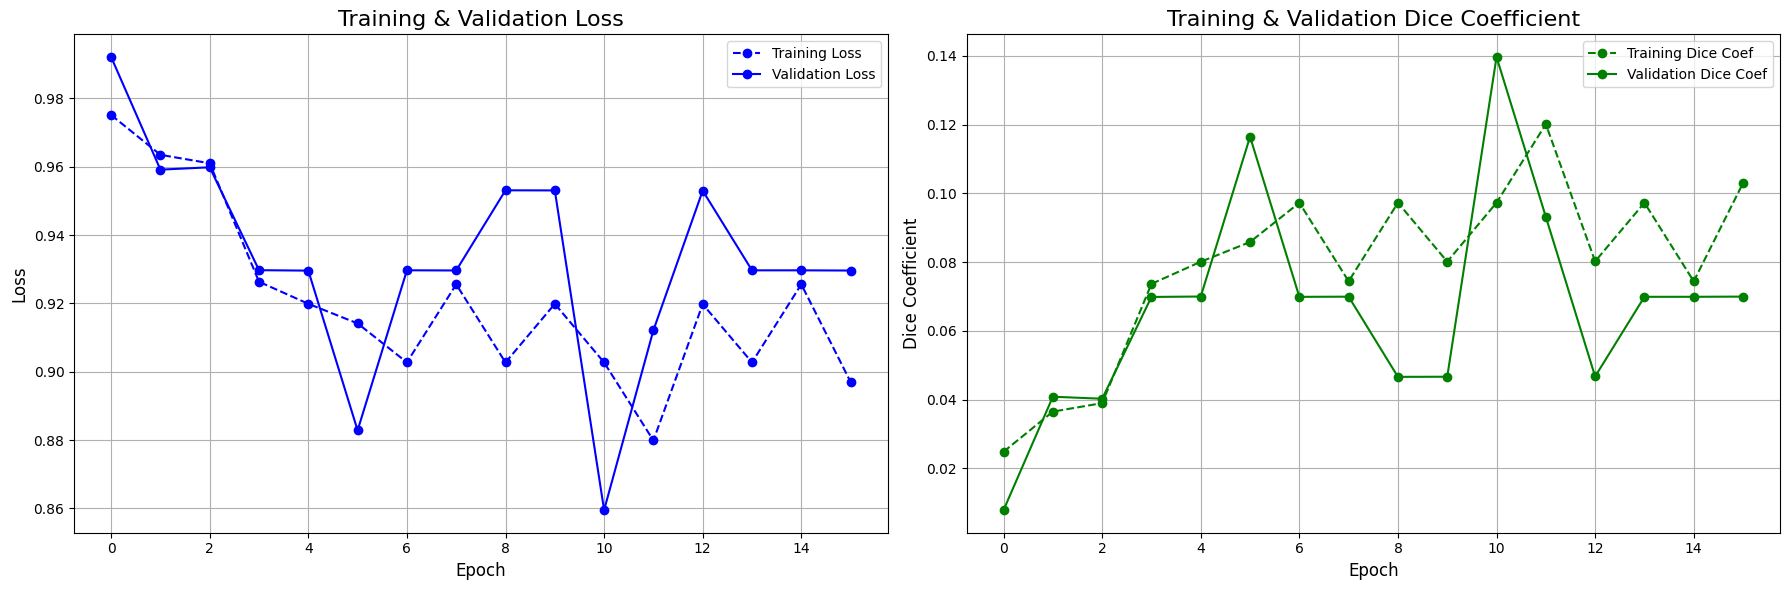


▶️ 4. Trực quan hóa kết quả dự đoán...


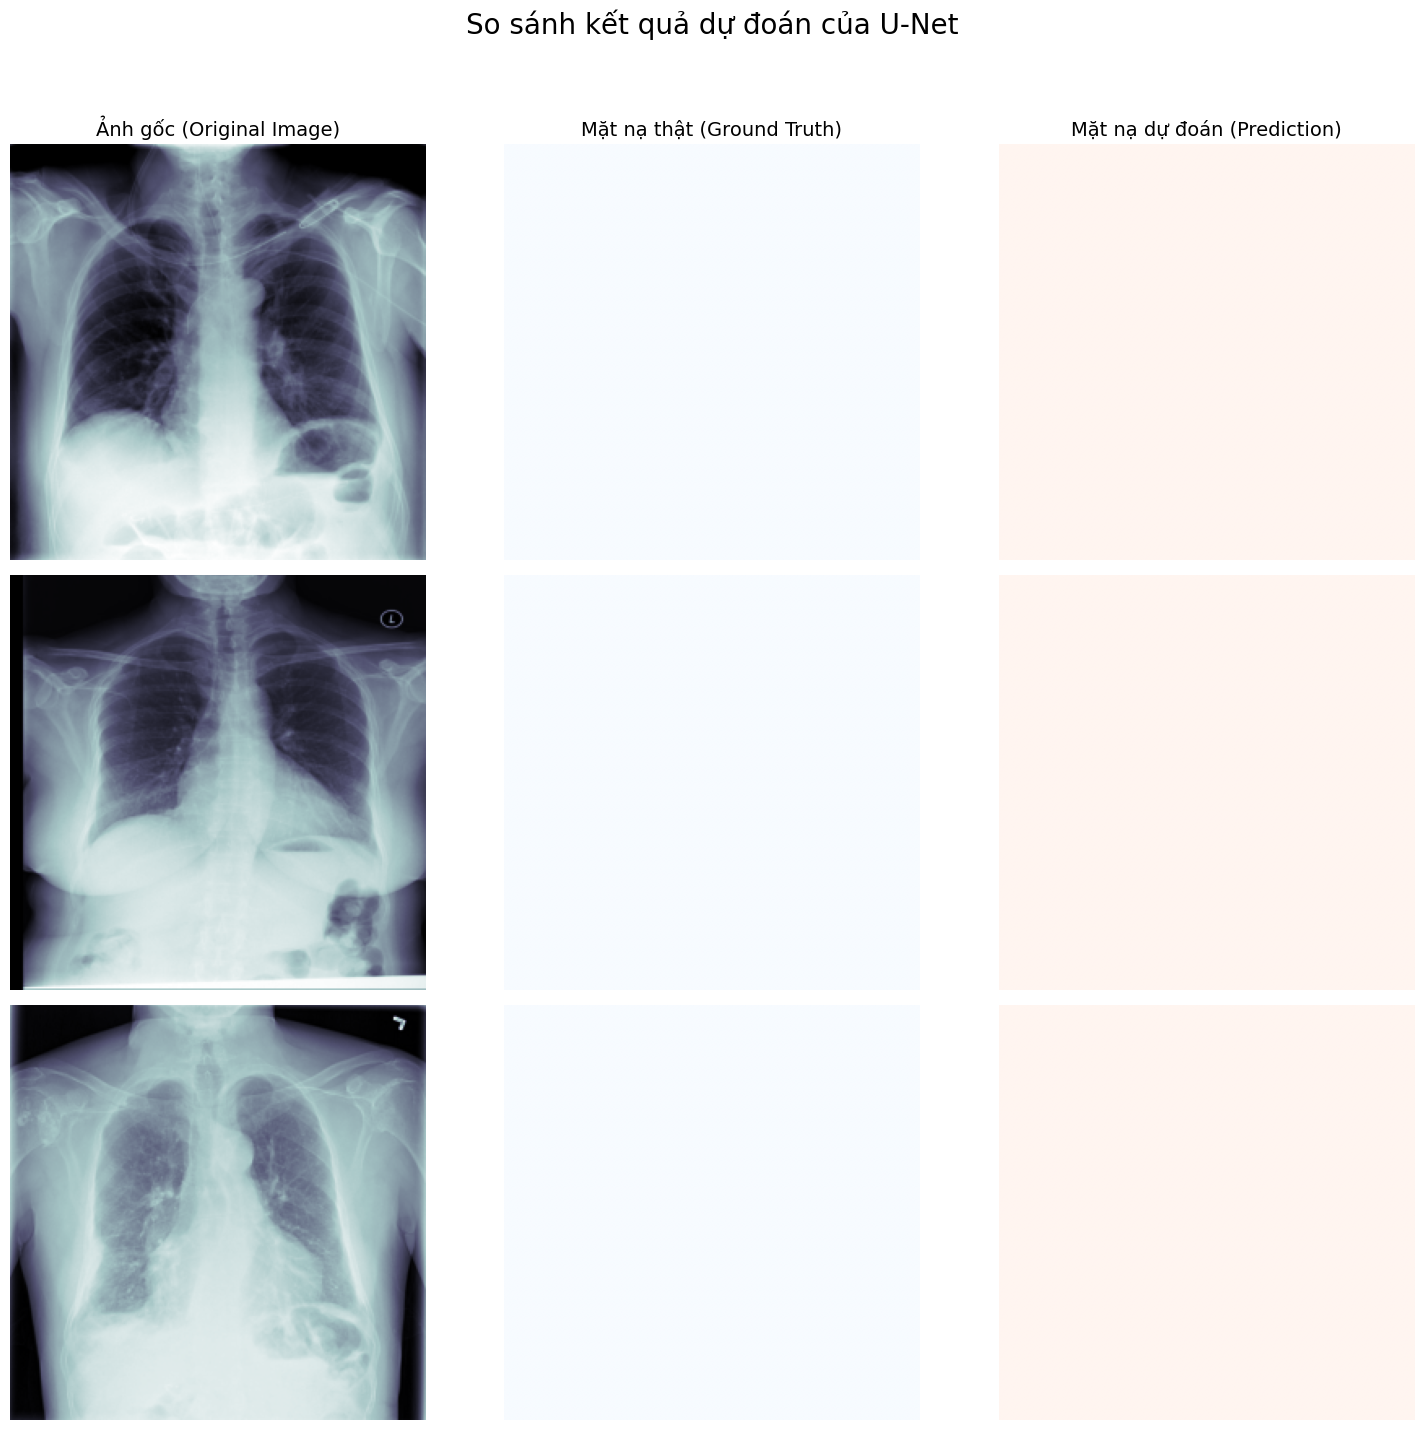

In [13]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import backend as K
import os
import pandas as pd

# --- Định nghĩa lại các hàm và biến cần thiết ---
# (Đảm bảo các biến từ các bước trước vẫn tồn tại trong phiên làm việc)

def dice_coef(y_true, y_pred, smooth=1):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def dice_loss(y_true, y_pred):
    return 1 - dice_coef(y_true, y_pred)

# Đường dẫn tới model đã lưu
MODEL_SAVE_PATH = os.path.join(DATA_DIR_DRIVE, 'unet_rsna_best_fast.keras')

# --- Bắt đầu trực quan hóa ---

print("="*50)
print("TRỰC QUAN HÓA BÁO CÁO KẾT QUẢ U-NET")
print("="*50)


# 1. Tải mô hình tốt nhất đã lưu
print("\n▶️ 1. Tải mô hình tốt nhất...")
try:
    best_model = tf.keras.models.load_model(
        MODEL_SAVE_PATH,
        custom_objects={'dice_loss': dice_loss, 'dice_coef': dice_coef}
    )
    print("✅ Tải mô hình thành công.")
except Exception as e:
    print(f"LỖI: Không thể tải mô hình. Hãy chắc chắn rằng bạn đã huấn luyện xong và tệp tồn tại. Lỗi: {e}")
    # Thoát khỏi ô mã nếu không tải được model
    raise e

# --- 2. Đánh giá định lượng ---
print("\n▶️ 2. Đánh giá định lượng trên tập Validation...")
validation_steps = len(val_ids) // BATCH_SIZE if (len(val_ids) // BATCH_SIZE) > 0 else 1
eval_results = best_model.evaluate(val_gen, steps=validation_steps, verbose=0)

# Tạo và hiển thị bảng kết quả
results_df = pd.DataFrame({
    'Metric': ['Validation Loss', 'Validation Dice Coefficient', 'Validation Binary Accuracy'],
    'Score': [f"{eval_results[0]:.4f}", f"{eval_results[1]:.4f}", f"{eval_results[2]:.4f}"]
})
print("\n--- Bảng kết quả định lượng ---")
print(results_df.to_string(index=False))
print("--------------------------------\n")


# --- 3. Biểu đồ lịch sử huấn luyện ---
# Biến 'history' được tạo ra từ lệnh model.fit() ở bước trước
print("\n▶️ 3. Vẽ biểu đồ lịch sử huấn luyện...")
if 'history' in locals() or 'history' in globals():
    plt.figure(figsize=(18, 6))

    # Biểu đồ Loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss', color='blue', marker='o', linestyle='--')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='blue', marker='o')
    plt.title('Training & Validation Loss', fontsize=16)
    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel('Loss', fontsize=12)
    plt.legend()
    plt.grid(True)

    # Biểu đồ Dice Coefficient
    plt.subplot(1, 2, 2)
    plt.plot(history.history['dice_coef'], label='Training Dice Coef', color='green', marker='o', linestyle='--')
    plt.plot(history.history['val_dice_coef'], label='Validation Dice Coef', color='green', marker='o')
    plt.title('Training & Validation Dice Coefficient', fontsize=16)
    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel('Dice Coefficient', fontsize=12)
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()
else:
    print("Cảnh báo: Không tìm thấy biến 'history'. Hãy chạy lại bước huấn luyện để tạo biểu đồ.")


# --- 4. Kết quả dự đoán định tính ---
print("\n▶️ 4. Trực quan hóa kết quả dự đoán...")
# Lấy một batch dữ liệu từ tập validation
val_images, val_masks_true = next(val_gen)
# Dự đoán
val_masks_pred = best_model.predict(val_images, verbose=0)

# Hiển thị
n_samples = 3
fig, axes = plt.subplots(n_samples, 3, figsize=(15, n_samples * 5))
fig.suptitle('So sánh kết quả dự đoán của U-Net', fontsize=20)

axes[0, 0].set_title("Ảnh gốc (Original Image)", fontsize=14)
axes[0, 1].set_title("Mặt nạ thật (Ground Truth)", fontsize=14)
axes[0, 2].set_title("Mặt nạ dự đoán (Prediction)", fontsize=14)

for i in range(n_samples):
    axes[i, 0].imshow(val_images[i].squeeze(), cmap='bone')
    axes[i, 0].axis('off')

    axes[i, 1].imshow(val_masks_true[i].squeeze(), cmap='Blues')
    axes[i, 1].axis('off')

    axes[i, 2].imshow(val_masks_pred[i].squeeze() > 0.5, cmap='Reds') # Ngưỡng 0.5
    axes[i, 2].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# ***COMPARITION***

In [28]:
import pandas as pd
from IPython.display import display, Markdown

# --- NHẬP KẾT QUẢ BẠN THU ĐƯỢC VÀO ĐÂY ---
# Kết quả từ YOLOv8 (đã có từ lần train trước)
yolo_map50 = 0.809
yolo_speed_fps = "Rất nhanh (~50-100 FPS trên GPU)" # Ước tính

# Kết quả từ U-Net (lấy từ ô mã trực quan hóa ở trên)
# eval_results[1] là giá trị val_dice_coef
unet_dice_coef = eval_results[1]
unet_speed_fps = "Chậm hơn (~5-15 FPS trên GPU)" # Ước tính
# ---

# Tạo DataFrame để so sánh
comparison_data = {
    "Tiêu chí": [
        "Mục tiêu chính",
        "Loại Output",
        "Metric chính",
        "Kết quả (Hiệu suất)",
        "Tốc độ",
        "Ứng dụng phù hợp"
    ],
    "Mô hình YOLOv8": [
        "Phát hiện (Detection)",
        "Tọa độ hộp giới hạn (Bounding Box)",
        "mAP@50",
        f"{yolo_map50:.3f}",
        yolo_speed_fps,
        "Sàng lọc nhanh, xác định vị trí nghi ngờ"
    ],
    "Mô hình U-Net": [
        "Phân vùng (Segmentation)",
        "Mặt nạ điểm ảnh (Pixel Mask)",
        "Dice Coefficient",
        f"{unet_dice_coef:.3f}",
        unet_speed_fps,
        "Đánh giá chi tiết, đo lường kích thước vùng tổn thương"
    ]
}

comparison_df = pd.DataFrame(comparison_data)

# --- Hiển thị kết quả ---

display(Markdown("## Bảng so sánh hiệu suất mô hình YOLOv8 và U-Net"))
display(comparison_df)

display(Markdown("""
### Phân tích và Nhận xét

Từ bảng trên, ta có thể rút ra những nhận xét quan trọng sau:

1.  **Tính bổ trợ, không phải thay thế:** YOLOv8 và U-Net không thực sự cạnh tranh trực tiếp mà chúng bổ trợ cho nhau. Mỗi mô hình xuất sắc trong một nhiệm vụ khác nhau, phù hợp với các giai đoạn khác nhau trong quy trình chẩn đoán y tế.

2.  **YOLOv8 - Tốc độ là ưu tiên:** Với tốc độ xử lý rất cao, YOLOv8 là lựa chọn lý tưởng cho các hệ thống **sàng lọc tự động ban đầu**. Nó có thể nhanh chóng quét qua hàng ngàn ảnh X-quang để xác định các ca bệnh có dấu hiệu bất thường (nốt phổi) và gắn cờ chúng để các bác sĩ X-quang xem xét kỹ hơn.

3.  **U-Net - Độ chính xác chi tiết:** Khi một ca bệnh đã được xác định là có tổn thương (viêm phổi), U-Net phát huy vai trò của mình. Bằng cách tạo ra một mặt nạ phân vùng chính xác đến từng điểm ảnh, U-Net cho phép các bác sĩ **đo lường chính xác kích thước, diện tích, và hình dạng của vùng bị ảnh hưởng**. Thông tin này rất quan trọng để đánh giá mức độ nghiêm trọng của bệnh và theo dõi tiến trình điều trị.

**Kết luận dự án:** Nghiên cứu đã cho thấy việc kết hợp sức mạnh của cả hai kiến trúc là một hướng đi hiệu quả. Một quy trình chẩn đoán hoàn chỉnh có thể bắt đầu bằng YOLOv8 để phát hiện nhanh và kết thúc bằng U-Net để phân tích sâu, từ đó tối ưu hóa thời gian cho bác sĩ và tăng cường độ chính xác trong chẩn đoán.
"""))

## Bảng so sánh hiệu suất mô hình YOLOv8 và U-Net

,Tiêu chí,Mô hình YOLOv8,Mô hình U-Net
0,Mục tiêu chính,Phát hiện (Detection),Phân vùng (Segmentation)
1,Loại Output,Tọa độ hộp giới hạn (Bounding Box),Mặt nạ điểm ảnh (Pixel Mask)
2,Metric chính,mAP@50,Dice Coefficient
3,Kết quả (Hiệu suất),0.809,0.070
4,Tốc độ,Rất nhanh (~50-100 FPS trên GPU),Chậm hơn (~5-15 FPS trên GPU)
5,Ứng dụng phù hợp,"Sàng lọc nhanh, xác định vị trí nghi ngờ","Đánh giá chi tiết, đo lường kích thước vùng tổ..."



### Phân tích và Nhận xét

Từ bảng trên, ta có thể rút ra những nhận xét quan trọng sau:

1.  **Tính bổ trợ, không phải thay thế:** YOLOv8 và U-Net không thực sự cạnh tranh trực tiếp mà chúng bổ trợ cho nhau. Mỗi mô hình xuất sắc trong một nhiệm vụ khác nhau, phù hợp với các giai đoạn khác nhau trong quy trình chẩn đoán y tế.

2.  **YOLOv8 - Tốc độ là ưu tiên:** Với tốc độ xử lý rất cao, YOLOv8 là lựa chọn lý tưởng cho các hệ thống **sàng lọc tự động ban đầu**. Nó có thể nhanh chóng quét qua hàng ngàn ảnh X-quang để xác định các ca bệnh có dấu hiệu bất thường (nốt phổi) và gắn cờ chúng để các bác sĩ X-quang xem xét kỹ hơn.

3.  **U-Net - Độ chính xác chi tiết:** Khi một ca bệnh đã được xác định là có tổn thương (viêm phổi), U-Net phát huy vai trò của mình. Bằng cách tạo ra một mặt nạ phân vùng chính xác đến từng điểm ảnh, U-Net cho phép các bác sĩ **đo lường chính xác kích thước, diện tích, và hình dạng của vùng bị ảnh hưởng**. Thông tin này rất quan trọng để đánh giá mức độ nghiêm trọng của bệnh và theo dõi tiến trình điều trị.

**Kết luận dự án:** Nghiên cứu đã cho thấy việc kết hợp sức mạnh của cả hai kiến trúc là một hướng đi hiệu quả. Một quy trình chẩn đoán hoàn chỉnh có thể bắt đầu bằng YOLOv8 để phát hiện nhanh và kết thúc bằng U-Net để phân tích sâu, từ đó tối ưu hóa thời gian cho bác sĩ và tăng cường độ chính xác trong chẩn đoán.
